In this notebook, we are going to to do some exploratory data analysis on the famous Iris dataset.

# Outline 
* [Brief Description of the Data Set and a Summary of its Attributes](#1)
* [Initial Plan for Data Exploration](#2)
 * [Summary Statistics](#21)
 * [Data Visualization](#22)
* [Data Cleaning](#3)
* [Hypothesis Testing](#4)
 * [Shapiro–Wilk test](#41)
 * [chi-square test](#42)
* [Next Steps](#5)

In [1]:
#import the important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

 ## Brief Description of the Data Set and a Summary of its Attributes <a anchor = "anchor" id = 1></a>
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms. Here are pictures of the three flowers species:

<img src = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" > 



### Dataset Attributes

 - sepal length in cm  
 - sepal width in cm
 - petal length in cm
 - petal width in cm
 - class:
  -  Iris Setosa
  -  Iris Versicolour
  -   Iris Virginica
 

### Initial Plan for Data Exploration <a anchor = "anchor" id = 2></a>
The goal of data exploration to understand the data set and summarize their characteristics. We will understand the data through two techniques: 

#### Summary Statistics  <a anchor = "anchor" id = 21></a>
Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers.




In [2]:
#read the dataset

data = pd.read_csv("IRIS.csv")

In [3]:
#Explore the data 
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Explore the shape of the data 
data.shape

(150, 5)

In [5]:
#Explore the first five columns in the dataset 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#get the columns names in the datset 
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#explore how many data points for each class
data["species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [8]:
#summary for all the attributes
data.describe(include = "all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
# compute the covariance and corellation between pairs of attributes 
print("Covariance:")
data.cov()

Covariance:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [10]:
print("Correlation")
data.corr()

Correlation


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


 __Observations:__
 
 - The correlation between petal length and petal width is 0.96 which indicate thart they have negative correlation relationship
 - The correlation between sepal length and sepal width is -0.109 which indicate that they have positive correlation relationship
 - Also, we can see that Petal Length and Petal Width __have stronger correlation relationship__ than Sepal length and Sepal Width
 
 





#### Data Visualization <a anchor = "anchor" id = 22></a>
Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships among data items or attributes can be analyzed or reported.

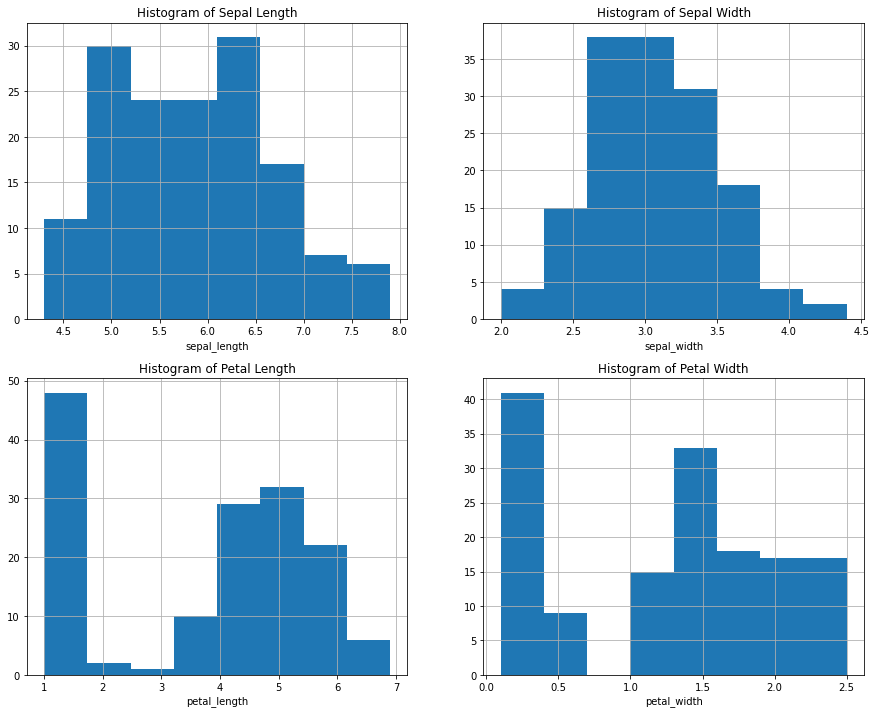

In [11]:
#Create a histogram for the attributes by 
#discretizing each of them into 8 separate bins and counting the frequency for each bin
columns = list(data.columns)
plt.figure(figsize = (15,12))
for i in range(1,5,1):
    plt.subplot(2,2,i)
    data.iloc[:,i-1].hist(bins = 8)
    plt.xlabel(columns[i - 1])
    plt.title("Histogram of " + columns[i - 1].replace("_", " ").title())

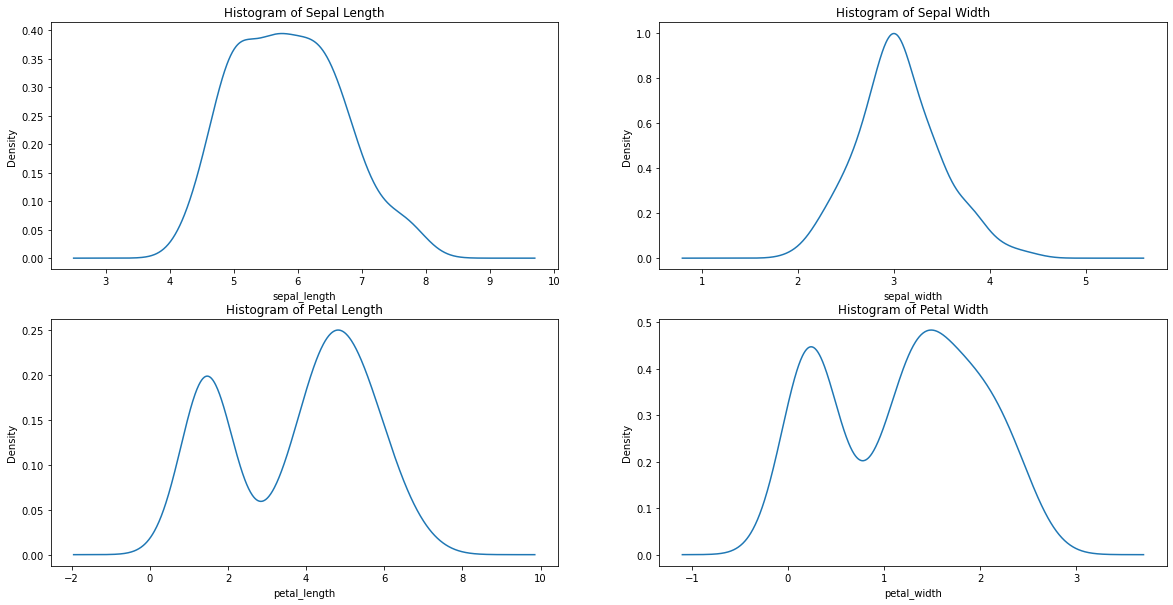

In [12]:
# plot the density plot for the attributes
plt.figure(figsize = (20,10))
for i in range(1,5,1):
    plt.subplot(2,2,i)
    data.iloc[:,i-1].plot.kde()
    plt.xlabel(columns[i - 1])
    plt.title("Histogram of " + columns[i - 1].replace("_", " ").title())

__Observations:__

- The attributes don't seem normally distributed 
- Sepal lenght has a flat top with positive skewness
- Sepal width seems to have positive kurtosis
- Petal lenght and petal width are bimodal, which might indicate the presence of multiple populations

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:364: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FD8E7D610>,
      dtype=object)

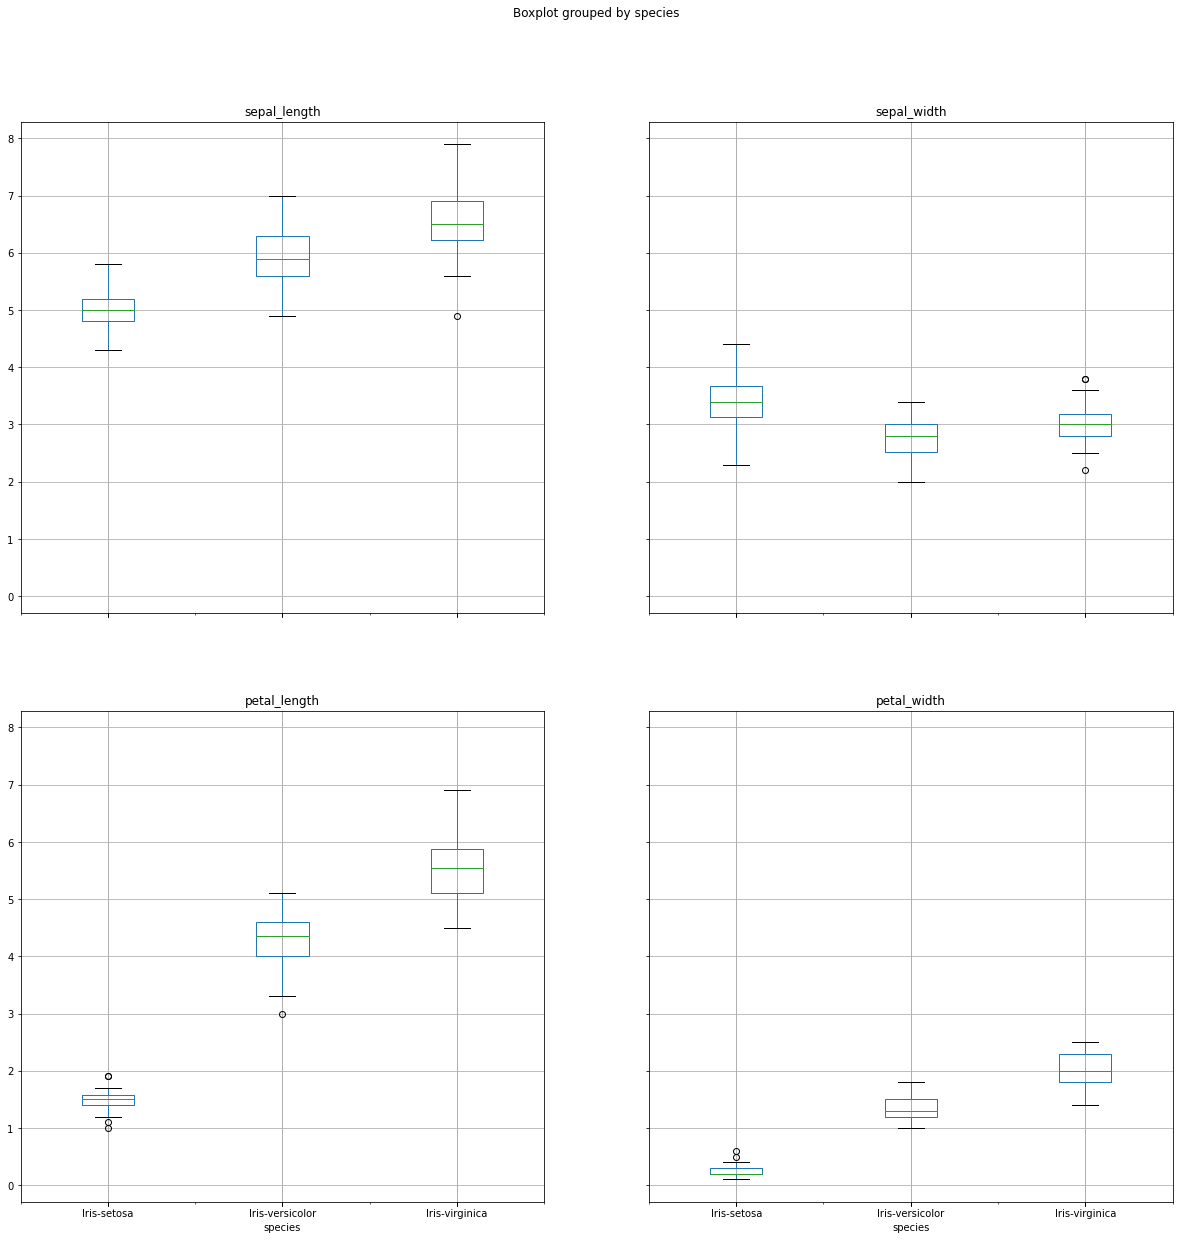

In [45]:
fig, ax = plt.subplots(figsize=(20,20))
data.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], by = "species",  ax=ax)

__Observations:__

- The boxplots confirm that the range of the Setosa’s petal length and width are lower than the other two, so already these two features seem useful for predicting species. 



lets plot a scatter plot between petal length and petal width and also for sepal length and sepal width to see if there is a linear relationship between them 

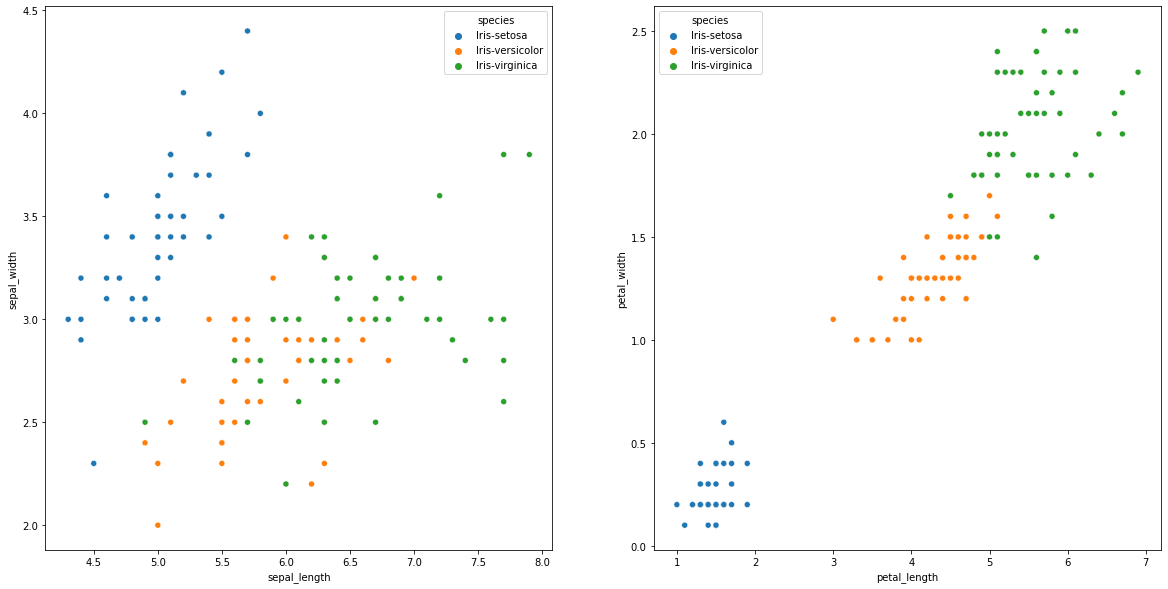

In [87]:
plt.figure(figsize = (20,10))
j = 1
for i in range(0,4,2):
    plt.subplot(1,2,j)
    sns.scatterplot(data = data, x = data[columns[i]],y = data[columns[i + 1]], hue = "species")
    j += 1

__Observations:__

- Sepal measurements are unhelpful since we cannot cluster every class  out of the three classes in species 
- However, Petal measurements are very helpful since we can see from the plot three clusters and every one specified in a specific range 

### Data Cleaning <a anchor = "anchor" id = 3></a>


In [89]:
#count the number of missing values in the dataset 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

__Observation:__

- We can see that the data is cleaned so we don't need any imputation 

### Hypothesis Testing <a anchor = "anchor" id = 4></a>


#### Shapiro–Wilk test <a anchor = "anchor" id = 41></a>

We can check the normality of the data using __Shapiro–Wilk test__. 

What does p-value mean in Shapiro-Wilk test?
 - The Prob < W value listed in the output is the p-value. 
 - If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. 
 - If the p-value is greater than 0.05, then the null hypothesis is not rejected.

In [103]:
from scipy import stats
from scipy.stats import shapiro

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [99]:
#The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that 
#the data was drawn from a normal distribution, named for Samuel Shapiro and Martin Wilk.

stat, p = shapiro(data['sepal_length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('sepal_length feature distribution looks normal (fail to reject H0)')
else:
    print('sepal_length feature distribution does not look normal (reject H0)')
    

stat, p = shapiro(data['sepal_width'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('sepal_width feature distribution looks normal (fail to reject H0)')
else:
    print('sepal_width feature distribution does not look normal (reject H0)')
    

stat, p = shapiro(data['petal_length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('petal_length feature distribution looks normal (fail to reject H0)')
else:
    print('petal_length feature distribution does not look normal (reject H0)')

stat, p = shapiro(data['petal_width'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Ppetal_width feature distribution looks normal (fail to reject H0)')
else:
    print('Ppetal_width feature distribution does not look normal (reject H0)')

Statistics=0.976, p=0.010
sepal_length feature distribution does not look normal (reject H0)
Statistics=0.984, p=0.075
sepal_width feature distribution looks normal (fail to reject H0)
Statistics=0.876, p=0.000
petal_length feature distribution does not look normal (reject H0)
Statistics=0.903, p=0.000
Ppetal_width feature distribution does not look normal (reject H0)


####  chi-square test  <a anchor = "anchor" id = 42></a>
Let's use chi-square test to understand relationship between categorical variables and target variable.

Assume Null hypothesys - Ho: Variables A(sepal_length/sepal_width/petal_length/petal_width) and Variable B(species) are independent.

Assume alternate hypothesys - Ha: Variable A sepal_length/sepal_width/petal_length/petal_width)and Variable B(species) are not independent.

Significance level : 0.05


In [104]:
print('Ho: species and sepal_length are not independent features')
print('Ha: species and sepal_length are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['species'], data['sepal_length']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: species and sepal_length are not independent features
Ha: species and sepal_length are independent features
chi_squared_stat : 156.26666666666668
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 6.665987344005466e-09
Dependent : Reject Hypothesis 0 (null Hypothesis)


In [105]:
print('Ho: species and sepal_width are not independent features')
print('Ha: species and sepal_width are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['species'], data['sepal_width']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: species and sepal_width are not independent features
Ha: species and sepal_width are independent features
chi_squared_stat : 88.36446886446886
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 8.303947787862062e-05
Dependent : Reject Hypothesis 0 (null Hypothesis)


In [106]:
print('Ho: species and petal_length are not independent features')
print('Ha: species and petal_length are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['species'], data['petal_length']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

Ho: species and petal_length are not independent features
Ha: species and petal_length are independent features
chi_squared_stat : 271.79999999999995
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 1.1775672327529825e-21
Dependent : Reject Hypothesis 0 (null Hypothesis)


In [107]:
print('Ho: species and petal_width are not independent features')
print('Ha: species and petal_width are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['species'], data['petal_width']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')

Ho: species and petal_width are not independent features
Ha: species and petal_width are independent features
chi_squared_stat : 271.75
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 2.1648103108815957e-35
Dependent : Reject Hypothesis 0 (null Hypothesis)


__Observation:__
- A(sepal_length/sepal_width/petal_length/petal_width) and Variable B(species) are dependent on each other

<br>

### Pearson's correlation test  <a anchor = "anchor" id = 43></a>
Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.

If the P-value is smaller than the significance level (α =0.05), we REJECT the null hypothesis in favor of the alternative. We conclude that the correlation is statically significant. or in simple words “ we conclude that there is a linear relationship between x and y in the population at the α level

In [114]:
corr_df = pd.DataFrame(columns = ['r', 'p'])

for col in data:
    if pd.api.types.is_numeric_dtype(data[col]) and col != 'sepal_length':
        r,p = stats.pearsonr(data.sepal_length,data[col])
        corr_df.loc[col] = [round(r,3), round(p,3)]

In [115]:
corr_df

,r,p
sepal_width,-0.109,0.183
petal_length,0.872,0.000
petal_width,0.818,0.000


__Observation__:

- we accept the null hypothesis for sepal length and sepal width
- we reject the null hypothesis for sepal length and petal length 
- we reject the null hypothesis for sepal length and petal width 

### Next Steps <a anchor = "anchor" id = "5"></a>

The next step will be more throughly exploratory data analysis by inversting and creating another plots for our attributes to get more insights and after EDA step, we will try different machine learning algorithms to see which one is best for data set 